# **Import Libraries**

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

# **Load the dataset**

In [15]:
train_data = pd.read_csv('/content/train.csv')
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Exploratory Data Analysis**

In [18]:
train_df = train_data.drop('Id', axis=1)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train_df.shape

(1460, 80)

In [21]:
train_df.duplicated().sum()

0

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
numerical_features=list(train_df.select_dtypes(include=['float64','int64']).columns)
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [25]:
categorical_features=list((train_df.select_dtypes(exclude=['float64','int64']).columns))
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [26]:
print(len(numerical_features))
print(len(categorical_features))

37
43


In [27]:
train_df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [28]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # Store the label encoder if you need to inverse transform later

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


In [31]:
numerical_features=list(train_df.select_dtypes(include=['float64','int64']).columns)
print(len(numerical_features))

80


In [36]:
numeric_df = train_df.select_dtypes(include=[float, int])

# Correlation matrix
numeric_df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.386347,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,0.075910,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,-0.009895,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.386347,-0.111690,1.000000,0.426095,-0.040886,0.138101,-0.169641,-0.080757,NaN,-0.208276,...,0.206167,-0.195051,-0.040862,-0.006629,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.139781,-0.034452,0.426095,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,-0.121161,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.040886,-0.197131,1.000000,-0.015720,-0.010224,0.115995,0.001682,0.013960,...,0.004413,-0.004067,-0.029386,0.146712,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.011200,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,0.018902,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,-0.005992,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.034559,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,0.014325,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.063372,0.034169,0.006064,0.035717,-0.038118,0.033809,-0.089701,0.051579,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [37]:
duplicated_columns = train_df.columns[train_df.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Duplicated columns:", duplicated_columns)
else:
    print("No duplicated columns found.")

No duplicated columns found.


In [38]:
duplicated_rows = train_df[train_df.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [42]:
# Identify columns with missing values
columns_with_missing_values = train_df.columns[train_df.isnull().any()]

# Print the column names
print(columns_with_missing_values)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [44]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
null_numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
imputer.fit(train_df[null_numerical_columns])
train_df[null_numerical_columns] = imputer.transform(train_df[null_numerical_columns])

In [45]:
train_df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# **Visualize the data**

<ipython-input-46-da1a073cf347>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice']);


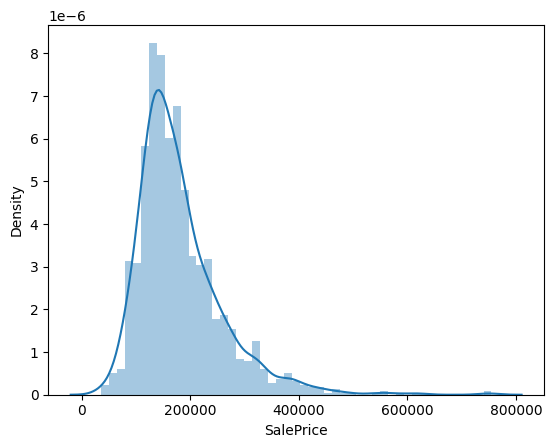

In [46]:
sns.distplot(train_df['SalePrice']);

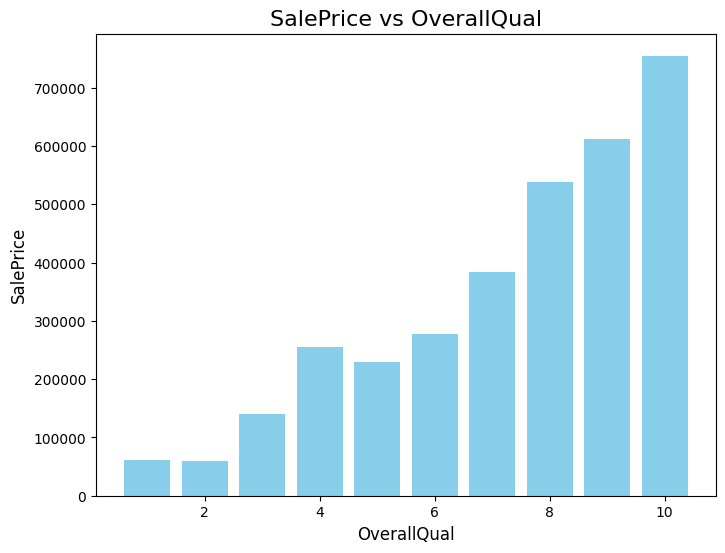

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(train_df['OverallQual'], train_df['SalePrice'], color='skyblue')  # Create the bar plot
plt.xlabel('OverallQual', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('SalePrice vs OverallQual', fontsize=16)


plt.show()

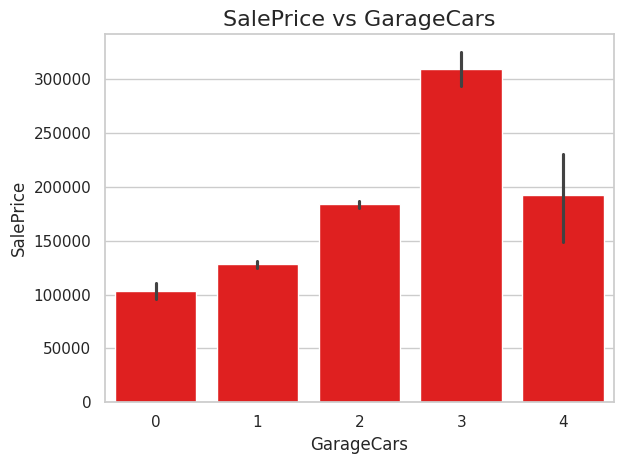

In [48]:
sns.set(style="whitegrid")
ax = sns.barplot(x="GarageCars", y="SalePrice", data=train_df, color='red')
plt.title("SalePrice vs GarageCars", fontsize=16)
ax.set_xlabel("GarageCars", fontsize=12)
ax.set_ylabel("SalePrice", fontsize=12)
plt.tight_layout()
plt.show()

# **Splitting the data**

In [49]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)

(1168, 79)
(292, 79)


In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Linear Regression**

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)
print(y_pred)

[149424.36471908 319840.20146276 109903.45870694 180292.83600666
 314200.36277634  74193.95768774 230670.49159663 147874.39537651
  73536.90530592 152828.78870375 151782.58043198 108823.08880396
  74351.5915066  207998.25697277 166739.9810531  138623.07035686
 212564.10695126 116224.3820889  115126.80918777 229723.82912133
 134196.65392596 208609.91732302 189063.6466475  119228.93736866
 216714.99625086 160326.16939396 210426.6480962   72619.89251922
 164141.76984654 200251.75380953 162532.41043095 256810.52464231
 179443.34141785 100505.90813896 252595.09571429 148155.98846916
 121826.90493637 217020.23915976 290900.82370213  91150.750645
 115012.54190447 252397.15646521 112405.22077223 319871.63553002
 124585.65380466 151162.45644123  95833.57091014 133525.51968552
 395186.42818379 124943.54584543 117558.97556407 217220.41387436
 102628.65864669 361902.24785973 152847.46365924 242731.32542709
 224241.94923787 183648.27258881 131419.86148808  97186.99901615
  26738.58560132 158604.468

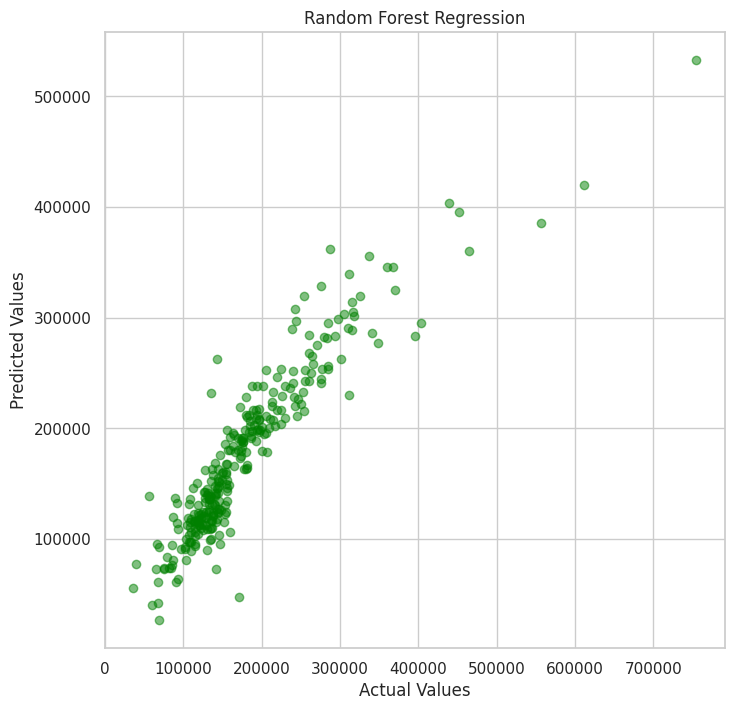

In [56]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.grid(True)
plt.show()

In [70]:
r2 = r2_score(y_test, y_pred)

print(f"R Squared Error: {r2:.2f}")

R Squared Error: 0.84
